In [12]:
import numpy as np
import pandas as pd

In [13]:
df = pd.read_csv("Job_Placement_Data.csv")
df.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


# 1 Preprocessing

In [14]:
df.shape

(215, 13)

In [15]:
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [18]:
df['status']

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [19]:
df.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


# 2 EDA (Exploratory Data Analysis)

In [20]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()

In [21]:
corr

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
ssc_percentage,1.000000,0.511472,0.538404,0.261993,0.388478
hsc_percentage,0.511472,1.000000,0.434206,0.245113,0.354823
degree_percentage,0.538404,0.434206,1.000000,0.224470,0.402364
emp_test_percentage,0.261993,0.245113,0.224470,1.000000,0.218055
mba_percent,0.388478,0.354823,0.402364,0.218055,1.000000


<Axes: >

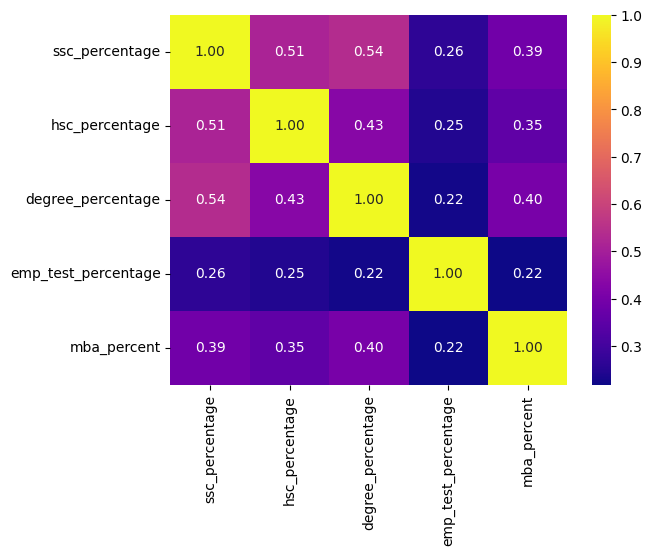

In [22]:
import seaborn as sns
sns.heatmap(corr,cmap='plasma',annot=True,fmt=".2f")

# Plot a histogram of the ssc_percentage column

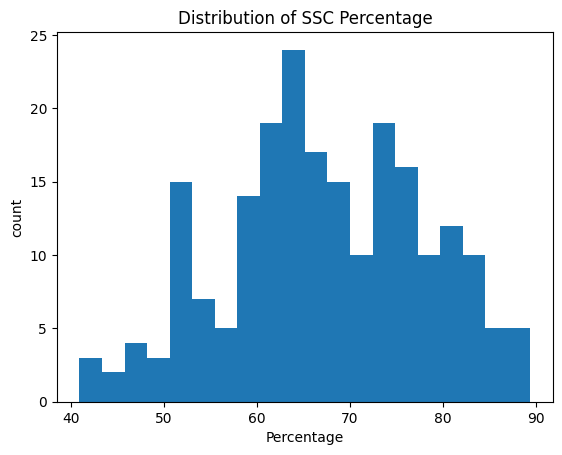

In [23]:
import matplotlib.pyplot as plt
plt.hist(df['ssc_percentage'],bins=20)
plt.title("Distribution of SSC Percentage")
plt.xlabel('Percentage')
plt.ylabel('count')
plt.show()

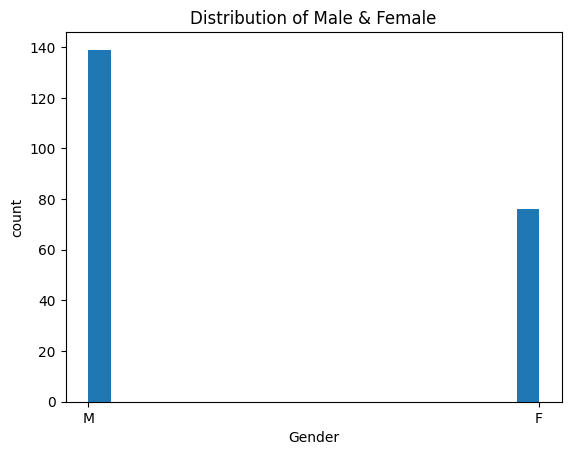

In [24]:
import matplotlib.pyplot as plt
plt.hist(df['gender'],bins=20)
plt.title("Distribution of Male & Female")
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()


# Plot a scatterplot of ssc_percentage vs. hsc_percentage

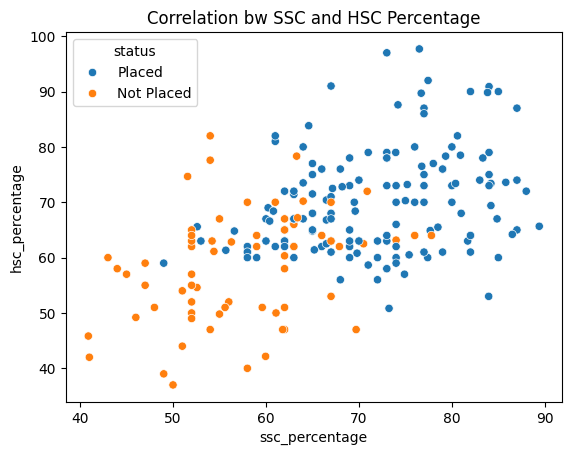

In [25]:
sns.scatterplot(x='ssc_percentage',y='hsc_percentage',data=df,hue='status')
plt.title("Correlation bw SSC and HSC Percentage")
plt.show()

# Plot a scatterplot of ssc_percentage vs. hsc_percentage

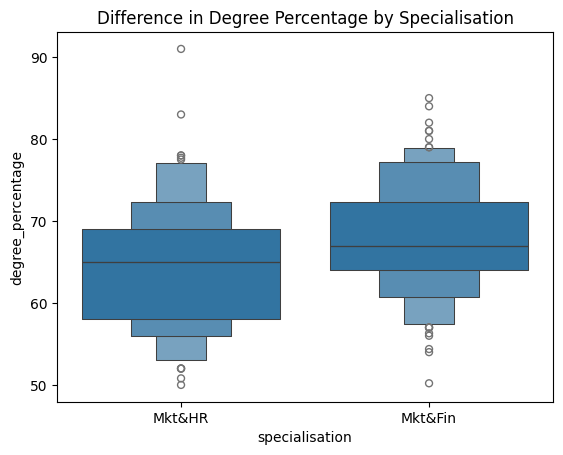

In [26]:
sns.boxenplot(x='specialisation',y='degree_percentage',data=df)
plt.title('Difference in Degree Percentage by Specialisation')
plt.show()

# categorical features into binary/dummy variables

In [27]:
df = pd.get_dummies(df,columns=['gender', 'ssc_board', 'hsc_board', 'hsc_subject', 'undergrad_degree', 'work_experience', 'specialisation', 'status'],drop_first=True)

In [28]:
df

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,True,True,True,True,False,False,True,False,True,True
1,79.33,78.33,77.48,86.5,66.28,True,False,True,False,True,False,True,True,False,True
2,65.00,68.00,64.00,75.0,57.80,True,False,False,False,False,False,False,False,False,True
3,56.00,52.00,52.00,66.0,59.43,True,False,False,False,True,False,True,False,True,False
4,85.80,73.60,73.30,96.8,55.50,True,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,True,True,True,True,False,False,False,False,False,True
211,58.00,60.00,72.00,74.0,53.62,True,True,True,False,True,False,True,False,False,True
212,67.00,67.00,73.00,59.0,69.72,True,True,True,True,False,False,False,True,False,True
213,74.00,66.00,58.00,70.0,60.23,False,True,True,True,False,False,False,False,True,True


# Train Test Split

In [29]:
x = df.drop('status_Placed',axis=1)
y = df['status_Placed']

In [30]:
print(x.shape,'\n\n',y.shape)

(215, 14) 

 (215,)


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(X_train.shape,'\n\n',X_test.shape)

(172, 14) 

 (43, 14)


# Train Logistic Model

In [33]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

d:\MLP\Prediction-Model\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# comparison between outputs

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.813953488372093


In [35]:
df.sample(5)

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent,gender_M,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,work_experience_Yes,specialisation_Mkt&HR,status_Placed
212,67.0,67.00,73.00,59.0,69.72,True,True,True,True,False,False,False,True,False,True
173,52.0,52.00,55.00,67.0,59.32,False,True,True,False,True,False,True,False,True,False
181,62.0,60.33,64.21,63.0,60.02,True,False,True,False,True,False,True,False,True,False
105,59.0,64.00,58.00,85.0,55.30,True,False,True,False,True,False,True,False,True,False
17,55.0,67.00,64.00,60.0,67.28,False,False,False,True,False,False,False,False,False,False


# Prediction System

In [36]:
input_data = (67.0,70.0,65.0,88.00,71.96,0,0,0,1,0,1,0,0,1)

np_df = np.asarray(input_data)
reshaped_df = np_df.reshape(1,-1)
pred = lg.predict(reshaped_df)
if pred[0] == 1:
    print("this person is placed for the job")
else:
    print("this person is not placed for the job")
    
    
import pickle
pickle.dump(lg,open('placement.pkl','wb'))

this person is not placed for the job


d:\MLP\Prediction-Model\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
